<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/F_E(Binning%26Binarization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [26]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]


In [27]:
df.dropna(inplace=True)

In [28]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [29]:
df['family'] = df['SibSp'] + df['Parch']

In [30]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [31]:
df.drop(columns=['SibSp','Parch'],inplace=True)


In [32]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [35]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [36]:
#Without binarization

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.6363636363636364

In [38]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6457746478873239

In [39]:
#Applying Binarization
from sklearn.preprocessing import Binarizer

In [40]:
trf = ColumnTransformer([('bin',Binarizer(copy=False),['family'])],remainder = 'passthrough')

In [41]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [42]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [44]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.630438184663537

##Binning
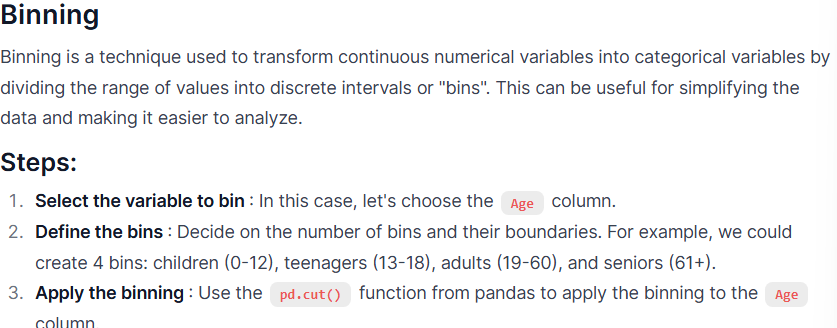

In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Define the bins and labels
bins = [0, 12, 18, 60, 100]
labels = ['children', 'teenagers', 'adults', 'seniors']

# Apply the binning
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Print the first few rows of the dataframe to see the result
print(df[['Age', 'Age_binned']].head())

    Age Age_binned
0  22.0     adults
1  38.0     adults
2  26.0     adults
3  35.0     adults
4  35.0     adults


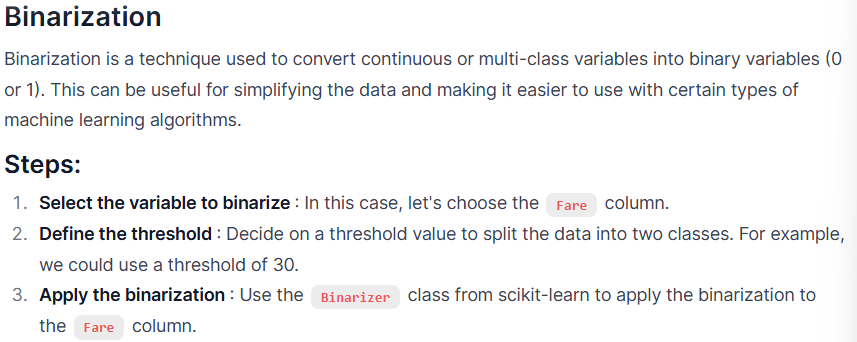

In [46]:
from sklearn.preprocessing import Binarizer

# Select the Fare column
fare = df['Fare'].values.reshape(-1, 1)

# Define the threshold
threshold = 30

# Apply the binarization
binarizer = Binarizer(threshold=threshold)
df['Fare_binarized'] = binarizer.fit_transform(fare)

# Print the first few rows of the dataframe to see the result
print(df[['Fare', 'Fare_binarized']].head())

      Fare  Fare_binarized
0   7.2500             0.0
1  71.2833             1.0
2   7.9250             0.0
3  53.1000             1.0
4   8.0500             0.0
